<a href="https://colab.research.google.com/github/UttaraKet1607/Malarial-Cell-Image-Segmentation/blob/main/Anomaly_training_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Resources
1. https://github.com/bnsreenu/python_for_microscopists/blob/master/260_image_anomaly_detection_using_autoencoders/260_image_anomaly_detection_using_autoencoders.py
2. https://www.youtube.com/watch?v=q_tpFGHiRgg
3. https://github.com/mayur7garg/MalariaCellImageClassification 

### Implementation

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria
! unzip cell-images-for-detecting-malaria.zip

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [41]:
import os
os.mkdir('/content/cell_images/Train_Uninfected')

FileExistsError: ignored

In [ ]:
import shutil

# absolute path
src_path = "/content/cell_images/Uninfected"
dst_path = "/content/cell_images/Train_Uninfected"
shutil.move(src_path, dst_path)

In [ ]:
os.mkdir('/content/cell_images/Test_Parasitized')

In [ ]:
# absolute path
src_path = "/content/cell_images/Parasitized"
dst_path = "/content/cell_images/Test_Parasitized"
shutil.move(src_path, dst_path)

In [2]:
#Size of our input images
Size = 128

#Define generators for training, validation and also anomaly data.

batch_size = 64
datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.3)
datagen = ImageDataGenerator(rescale=1./255)
train_dir = '/content/cell_images/Train_Uninfected'
test_dir = '/content/cell_images/Test_Parasitized'

train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(Size, Size),
    batch_size=batch_size,
    class_mode='input',
    subset='training',
    seed=42)

validation_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(Size, Size),
    batch_size=batch_size,
    class_mode='input',
    subset='validation',
    seed=42)

anomaly_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(Size, Size),
    batch_size=batch_size,
    class_mode='input',
    seed=42)

Found 9646 images belonging to 1 classes.
Found 4133 images belonging to 1 classes.
Found 13779 images belonging to 1 classes.


In [3]:
#Define the autoencoder
tf.random.set_seed(42)

#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(Size, Size, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

In [4]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0

In [5]:
#Fit the model. 
history = model.fit(
        train_generator,
        steps_per_epoch= 500 // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=75 // batch_size,
        shuffle = True)

Epoch 1/100
7/7 [==============================] - 6s 265ms/step - loss: 0.0890 - mse: 0.0890 - val_loss: 0.0766 - val_mse: 0.0766
Epoch 2/100
7/7 [==============================] - 2s 214ms/step - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 3/100
7/7 [==============================] - 2s 214ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 4/100
7/7 [==============================] - 2s 214ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 5/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 6/100
7/7 [==============================] - 2s 217ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 7/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 8/100
7/7 [==============================] - 2s 214ms/step - loss: 0.0118 - m

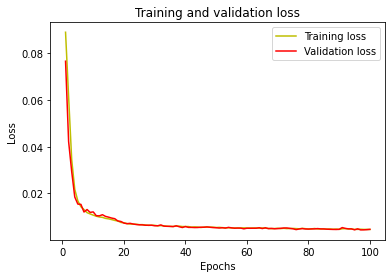

In [6]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

pred= model.predict(data_batch[0])  #Predict on the first batch of images
pred.shape, data_batch[0].shape

((64, 128, 128, 3), (64, 128, 128, 3))

In [8]:
pred_error = data_batch[0] - pred
pred_error_min = pred_error.min(axis = (1, 2, 3)).reshape(64,1,1,1)
pred_error_max = pred_error.max(axis = (1, 2, 3)).reshape(64,1,1,1)
norm_error = (pred_error - pred_error_min)/(pred_error_max - pred_error_min)

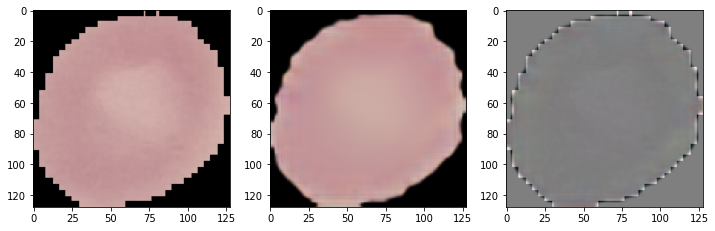

In [9]:
#View few images and corresponding reconstructions
image_number = random.randint(0, pred.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(data_batch[0][image_number])
plt.subplot(132)
plt.imshow(pred[image_number])
plt.subplot(133)
plt.imshow(norm_error[image_number])
plt.show()

In [ ]:
model.save(os.path.join('models', 'Autoencoder_Reconstruction'))

In [10]:
#Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = model.evaluate_generator(validation_generator)
anomaly_error = model.evaluate_generator(anomaly_generator)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


Recon. error for the validation (normal) data is:  [0.004528725519776344, 0.004528725519776344]
Recon. error for the anomaly data is:  [0.005168432369828224, 0.005168432369828224]


In [11]:
tf.random.set_seed(42)

model = tf.keras.models.load_model('/content/models/Autoencoder_Reconstruction')

for layer in autoencoder.layers:
    layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)      

In [16]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= validation_generator.batch_index:   #gets each generated batch of size batch_size
    data = validation_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

pred= model.predict(data_batch[0])  #Predict on the first batch of images
pred.shape, data_batch[0].shape

((64, 128, 128, 3), (64, 128, 128, 3))

In [17]:
pred_error = data_batch[0] - pred
pred_error_min = pred_error.min(axis = (1, 2, 3)).reshape(64,1,1,1)
pred_error_max = pred_error.max(axis = (1, 2, 3)).reshape(64,1,1,1)
norm_error = (pred_error - pred_error_min)/(pred_error_max - pred_error_min)

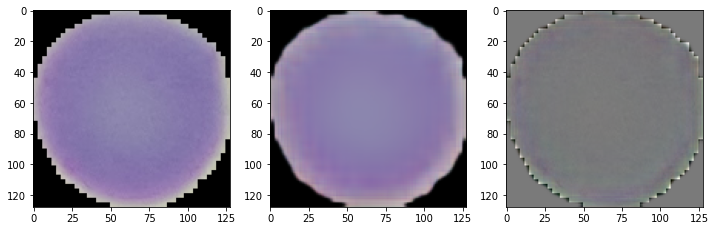

In [19]:
#View few images and corresponding reconstructions
image_number = random.randint(0, pred.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(data_batch[0][image_number])
plt.subplot(132)
plt.imshow(pred[image_number])
plt.subplot(133)
plt.imshow(norm_error[image_number])
plt.show()

In [20]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= anomaly_generator.batch_index:   #gets each generated batch of size batch_size
    data = anomaly_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

pred= model.predict(data_batch[0])  #Predict on the first batch of images
pred.shape, data_batch[0].shape

((64, 128, 128, 3), (64, 128, 128, 3))

In [21]:
pred_error = data_batch[0] - pred
pred_error_min = pred_error.min(axis = (1, 2, 3)).reshape(64,1,1,1)
pred_error_max = pred_error.max(axis = (1, 2, 3)).reshape(64,1,1,1)
norm_error = (pred_error - pred_error_min)/(pred_error_max - pred_error_min)

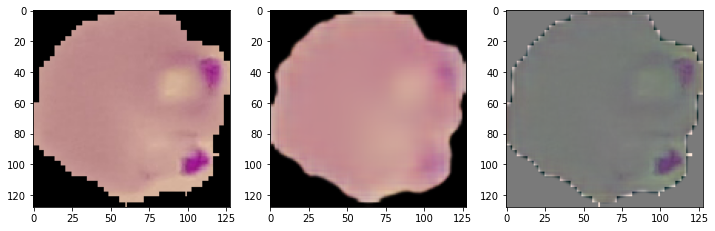

In [22]:
#View few images and corresponding reconstructions
image_number = random.randint(0, pred.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(data_batch[0][image_number])
plt.subplot(132)
plt.imshow(pred[image_number])
plt.subplot(133)
plt.imshow(norm_error[image_number])
plt.show()